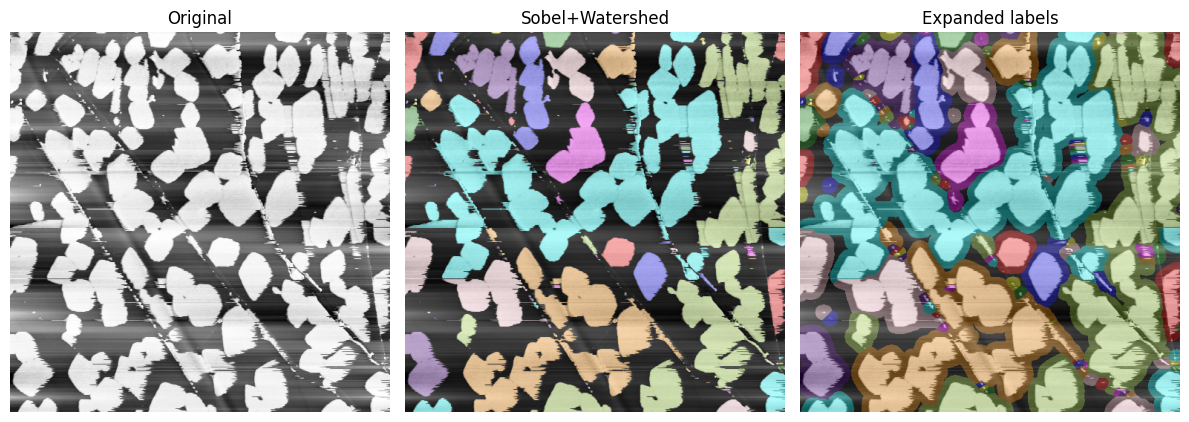

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import expand_labels, watershed
from skimage.color import label2rgb

# Function to process and display the segmentation
def process_image(image_path):
    # Load the image from the given path
    img = io.imread(image_path)

    # Convert the image to grayscale if it is not already
    if len(img.shape) == 3:
        img = color.rgb2gray(img)

    # Apply Sobel edge detection
    edges = sobel(img)

    # Initialize markers for watershed
    markers = np.zeros_like(img)
    foreground, background = 1, 2
    markers[img < 0.3] = background  # Adjust the threshold as needed
    markers[img > 0.7] = foreground  # Adjust the threshold as needed

    # Apply watershed segmentation
    ws = watershed(edges, markers)
    seg1 = label(ws == foreground)

    # Expand the labeled regions
    expanded = expand_labels(seg1, distance=10)

    # Display results
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6), sharex=True, sharey=True)

    axes[0].imshow(img, cmap="Greys_r")
    axes[0].set_title("Original")

    color1 = label2rgb(seg1, image=img, bg_label=0)
    axes[1].imshow(color1)
    axes[1].set_title("Sobel+Watershed")

    color2 = label2rgb(expanded, image=img, bg_label=0)
    axes[2].imshow(color2)
    axes[2].set_title("Expanded labels")

    for a in axes:
        a.axis("off")

    fig.tight_layout()
    plt.show()

# Example usage: Replace 'path_to_your_image.jpg' with the path to your image
image_path = '/content/14_phase.jpg'  # Update this path
process_image(image_path)


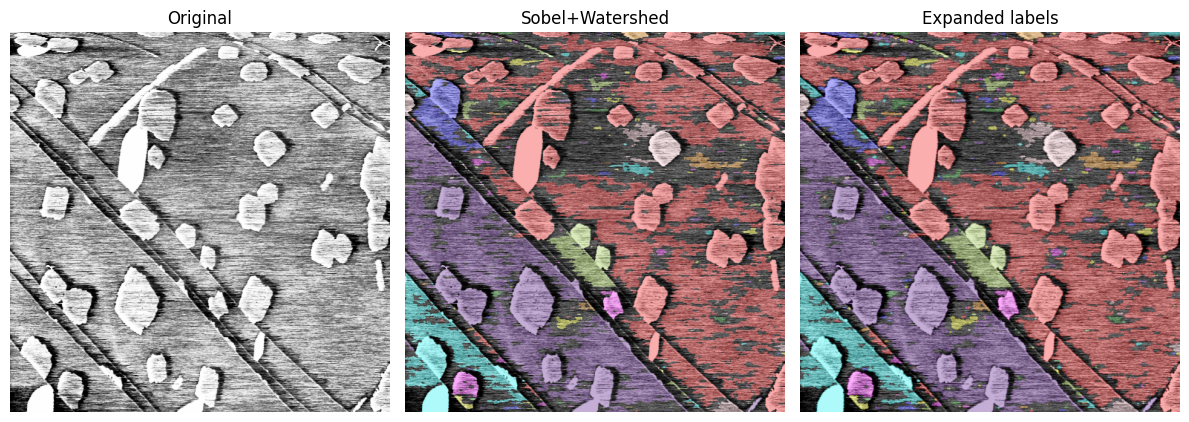

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import expand_labels, watershed
from skimage.color import label2rgb

# Function to process and display the segmentation
def process_image(image_path):
    # Load the image from the given path
    img = io.imread(image_path)

    # Convert the image to grayscale if it is not already
    if len(img.shape) == 3:
        img = color.rgb2gray(img)

    # Apply Sobel edge detection
    edges = sobel(img)

    # Initialize markers for watershed
    markers = np.zeros_like(img)
    foreground, background = 1, 2
    markers[img < 0.3] = background  # Adjust the threshold as needed
    markers[img > 0.7] = foreground  # Adjust the threshold as needed

    # Apply watershed segmentation
    ws = watershed(edges, markers)
    seg1 = label(ws == foreground)

    # Expand the labeled regions
    expanded = expand_labels(seg1, distance=1)

    # Display results
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6), sharex=True, sharey=True)

    axes[0].imshow(img, cmap="Greys_r")
    axes[0].set_title("Original")

    color1 = label2rgb(seg1, image=img, bg_label=0)
    axes[1].imshow(color1)
    axes[1].set_title("Sobel+Watershed")

    color2 = label2rgb(expanded, image=img, bg_label=0)
    axes[2].imshow(color2)
    axes[2].set_title("Expanded labels")

    for a in axes:
        a.axis("off")

    fig.tight_layout()
    plt.show()

# Example usage: Replace 'path_to_your_image.jpg' with the path to your image
image_path = '/content/11_phase.jpg'  # Update this path
process_image(image_path)